In [50]:
# imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
# sns for heatmap
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [51]:
df = pd.read_csv('Project-3\dataset\\train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
df.shape

(1460, 81)

In [53]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

Drop the ID column

In [54]:
df_cleaned = df.drop(columns='Id')
df_cleaned.shape

(1460, 80)

Lets take a closer look at the null values

In [55]:
null_cols = df_cleaned.columns[df_cleaned.isnull().any()]
df_nulls = df_cleaned[null_cols]
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

18 Nulls is interesting, lets take a look of the values for those features to help determine the next step

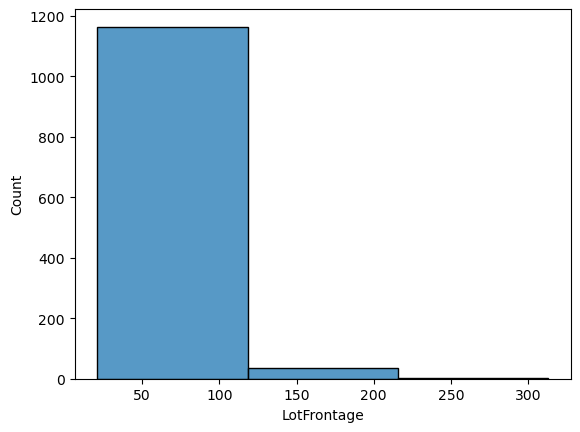

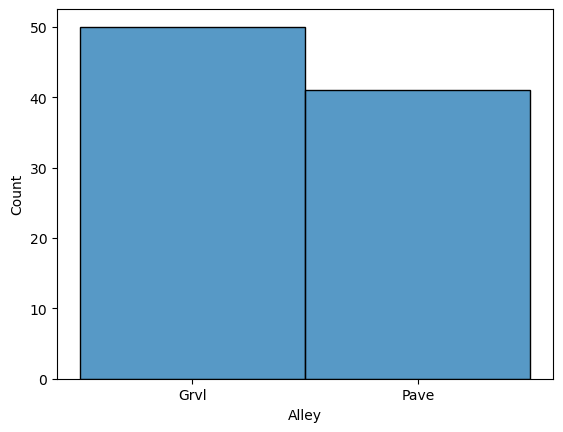

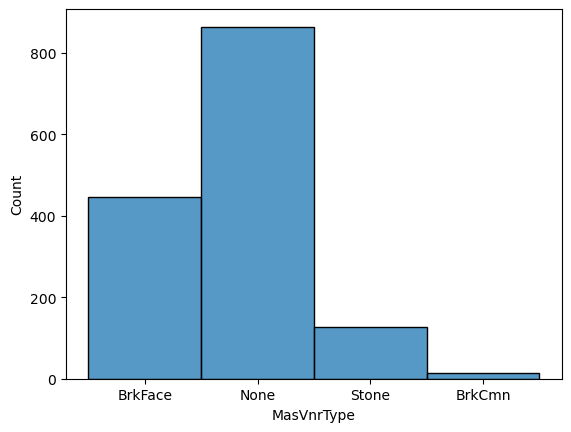

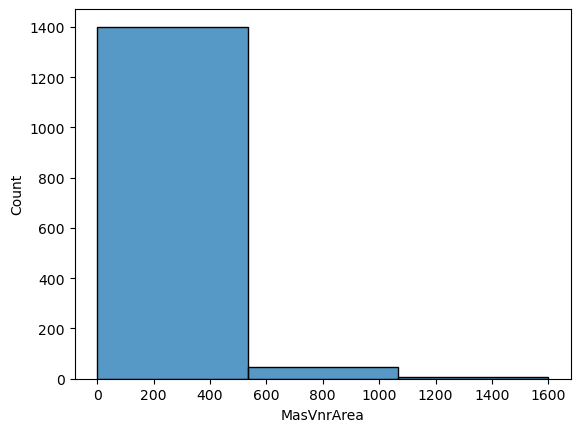

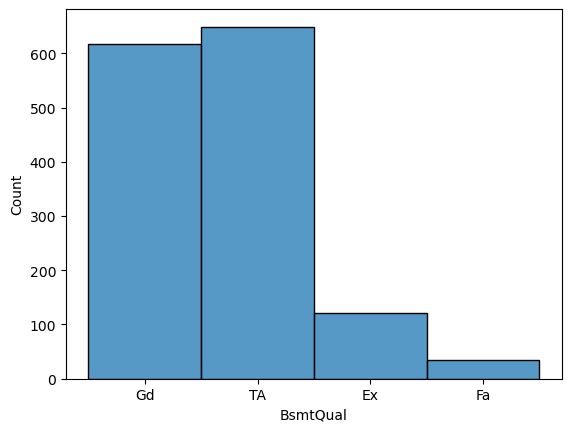

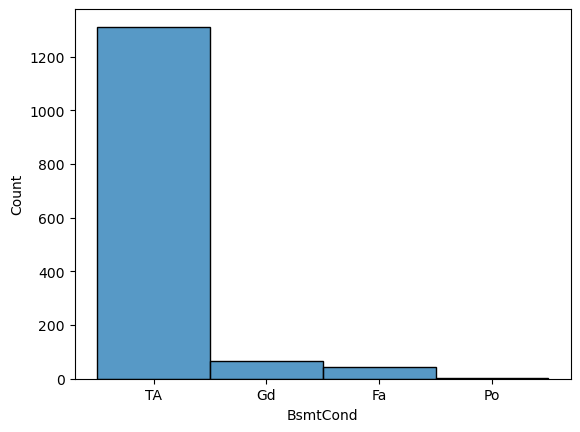

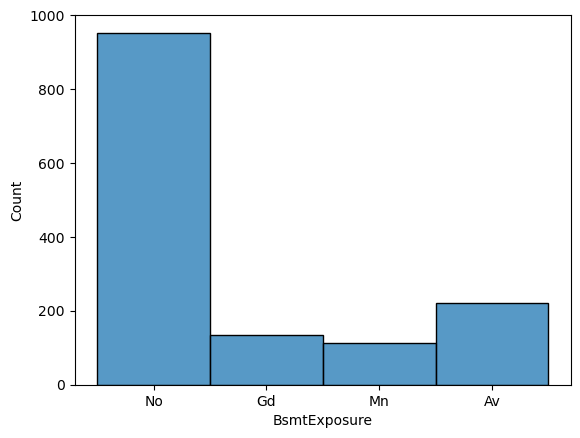

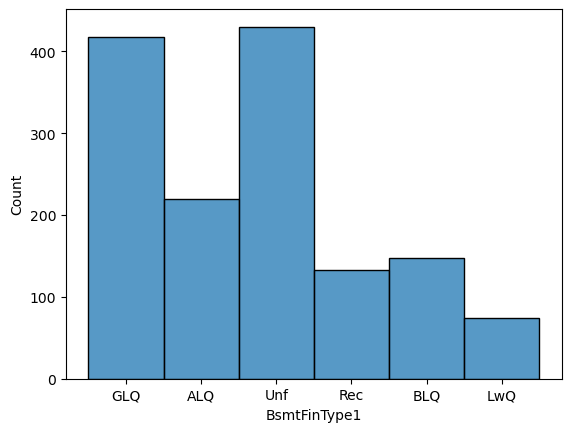

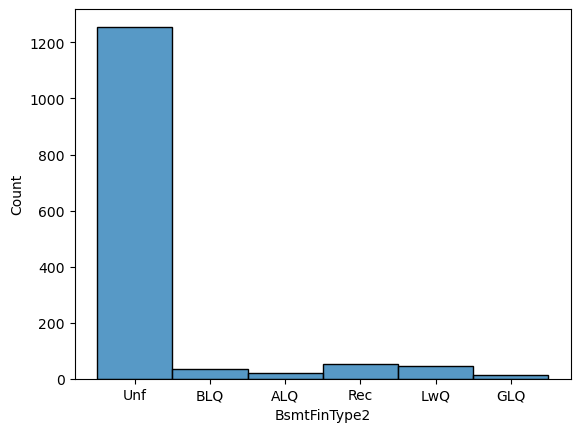

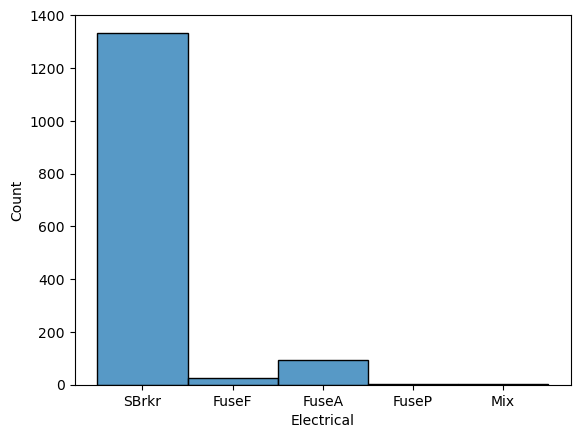

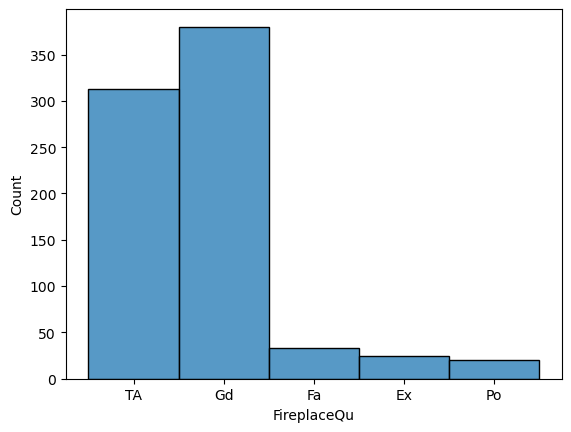

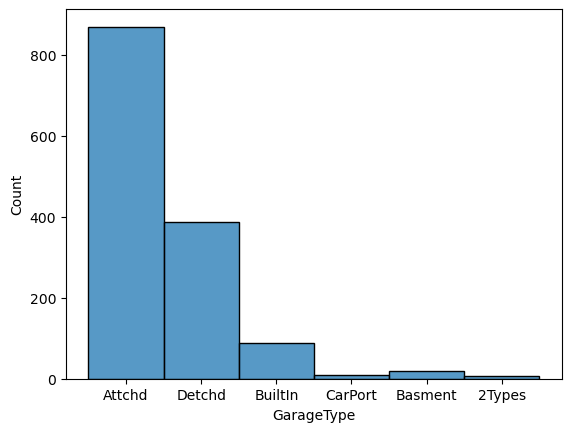

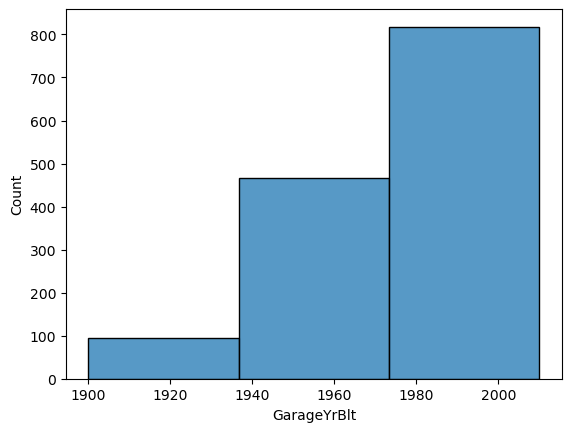

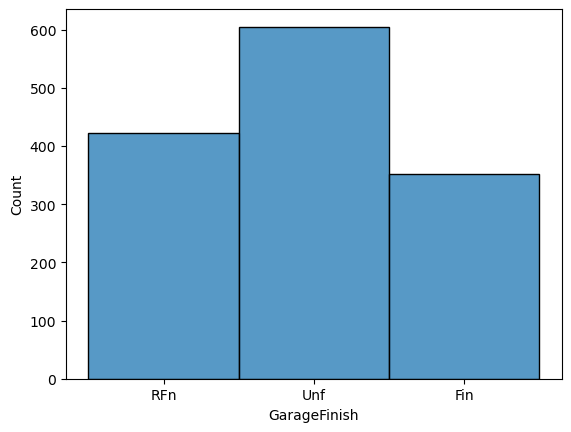

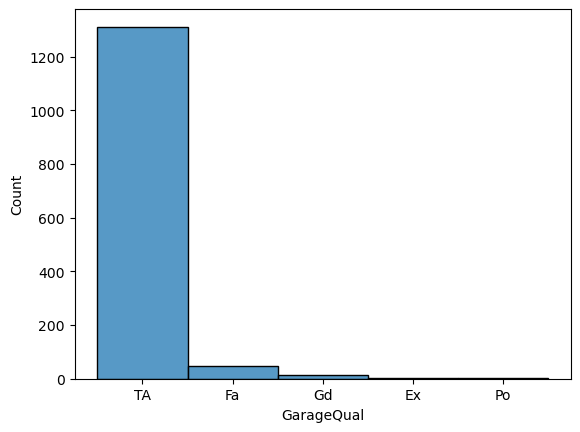

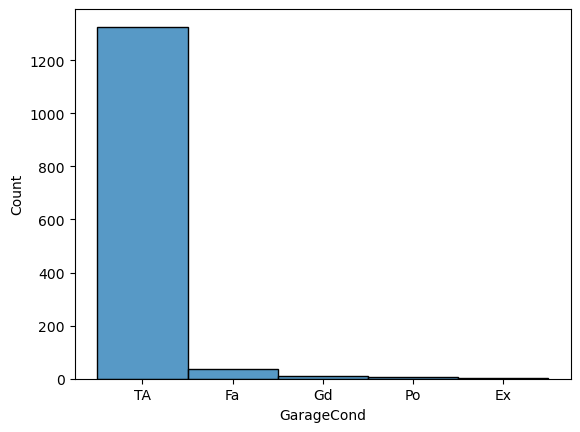

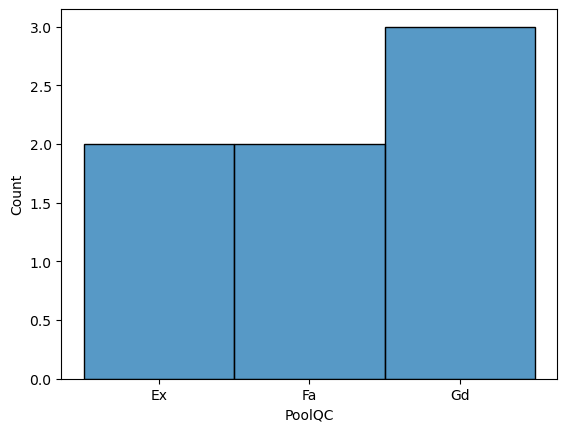

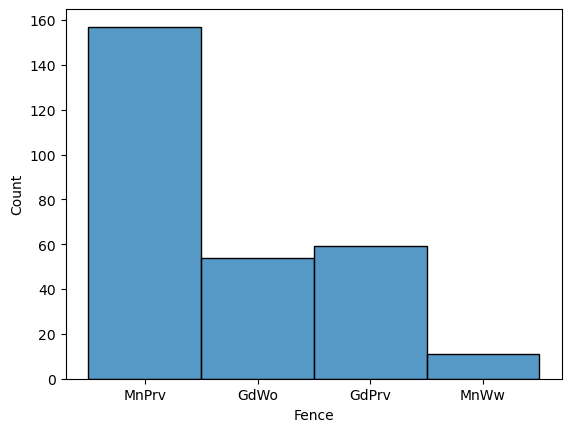

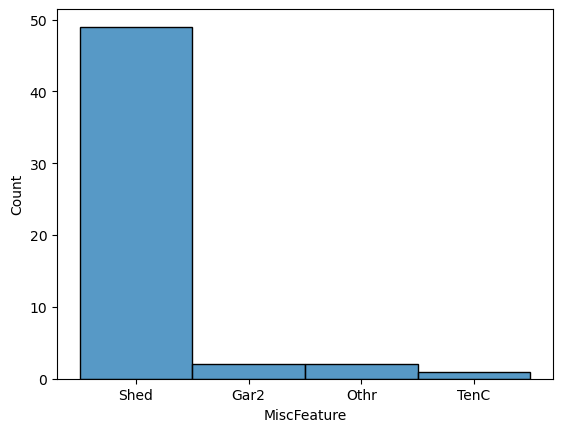

In [56]:
for feature in df_nulls.columns:
    sns.histplot(df[feature], bins=3)
    plt.show()

Lets also look at the corealtion of the items in the df

C:\Users\scoyl\AppData\Local\Temp\ipykernel_27468\1395014638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='plasma')


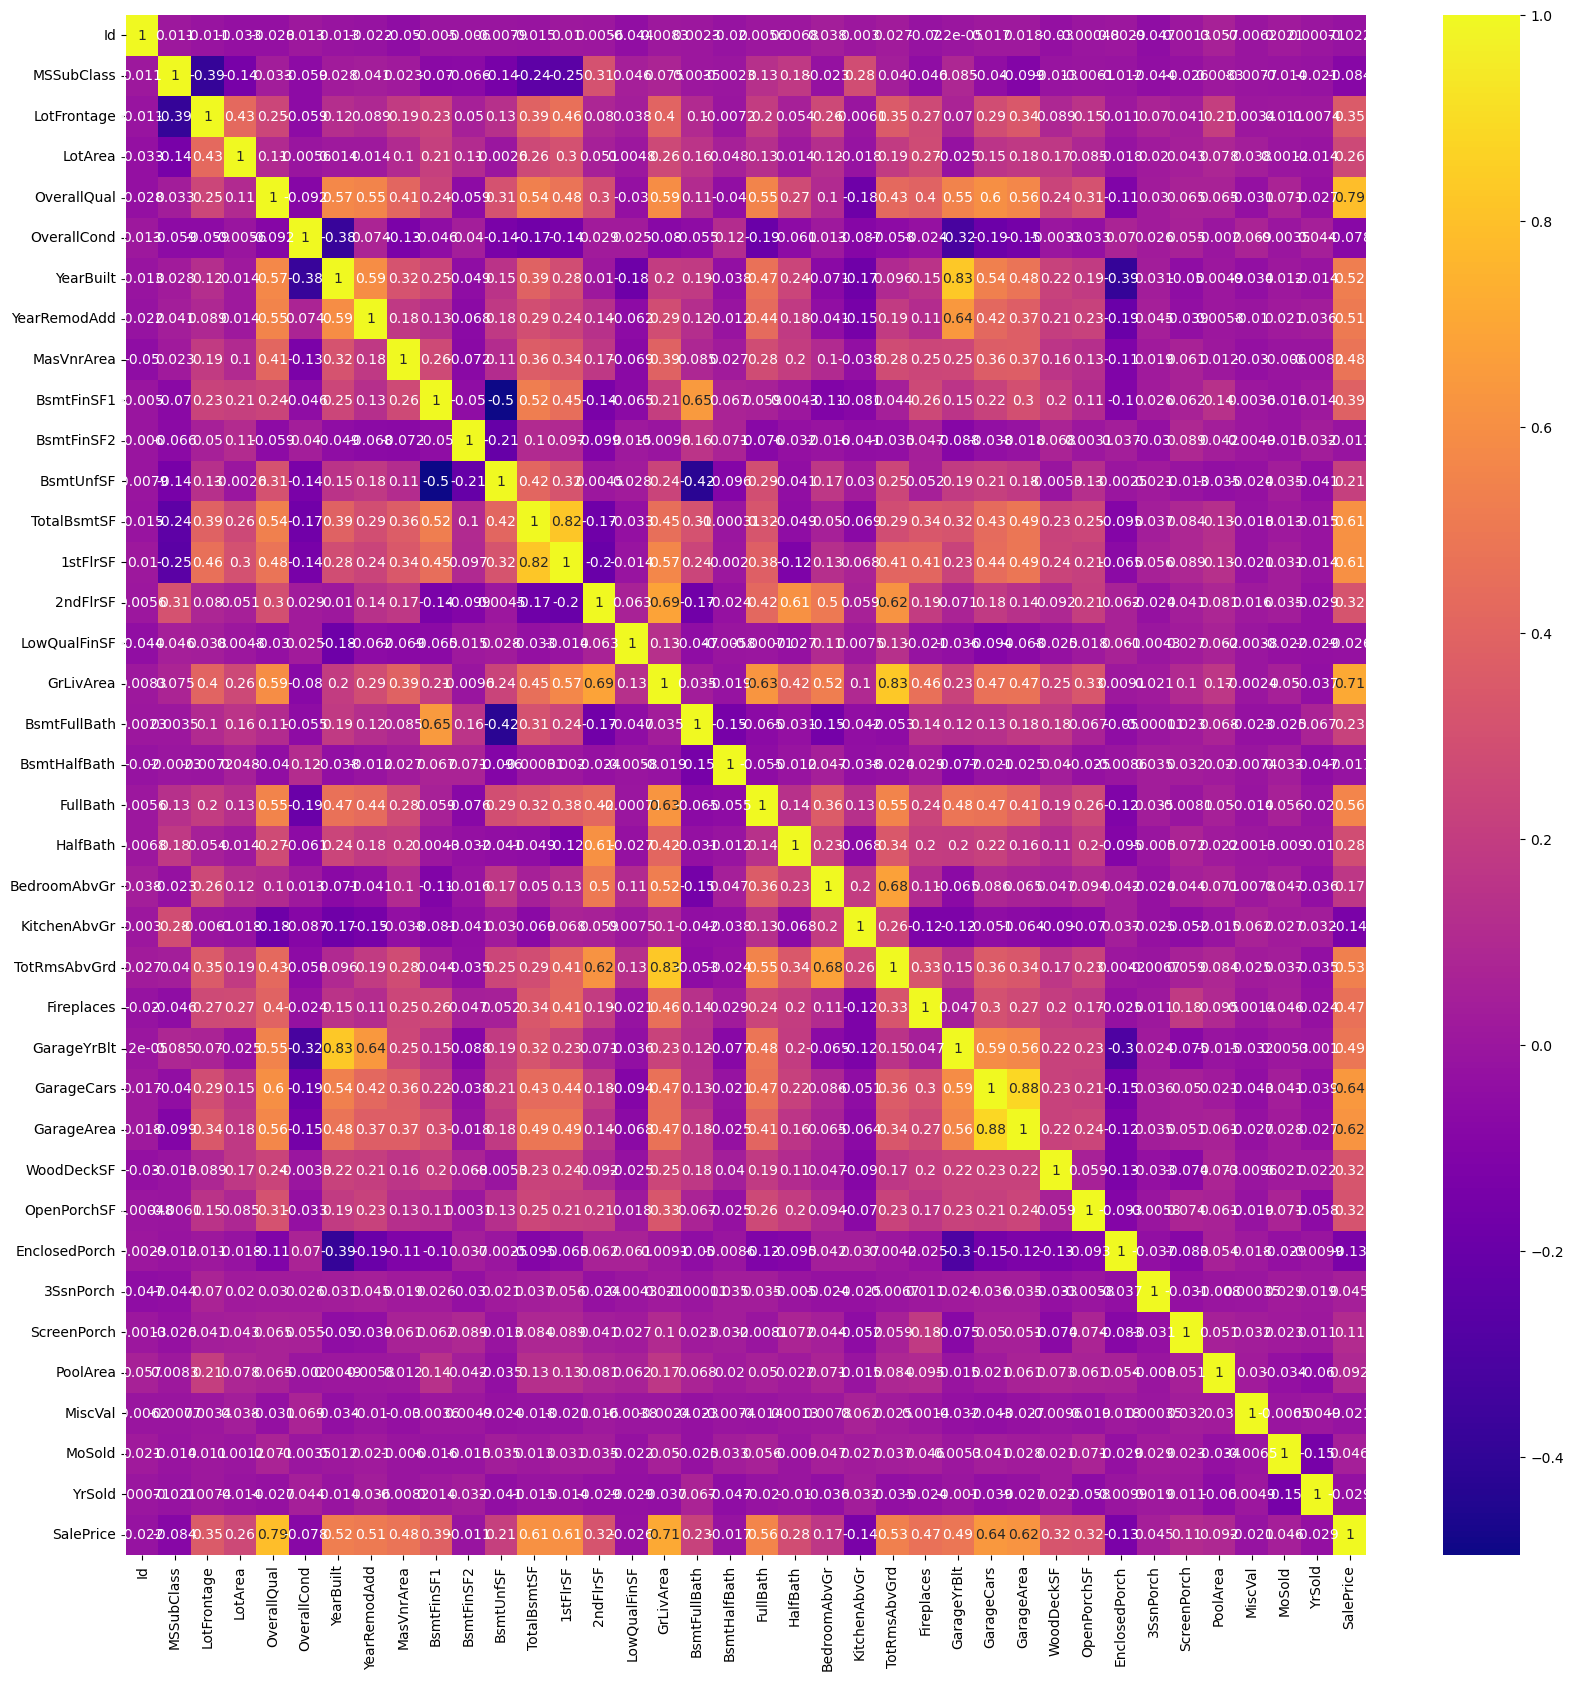

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

Looks like a lot of the features are items, that when are null indicate that its just not there for the house. i.e if garage is missing then its NA, so its a false null. 

In my mind there are two ways to deal with this.
1. for non numeric columns we one hot encoding.
2. for numeric values we can just average it or fill nulls with 0. 


Before we go through and fill nulls or one hot encoding, lets double check that the data is the right type (Ref to https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)

In [58]:
df_cleaned.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Only thing i see is from looking at the Kaggle page for the dataset MSSubClass refers to classifactoin types, so should be a str/object not a int since its categorical

In [60]:
df_cleaned['MSSubClass'] = df_cleaned['MSSubClass'].astype(str) #https://medium.com/@filip.sekan/3-ways-how-to-update-data-type-of-columns-in-pandas-97ddb5f32ae4

Before we do one hot encoding, lets do the correlation comapraison

In [61]:
df_cleaned_copy = df_cleaned.copy() #copy incase we want to redo how we clean data for expierments


# converting into a method since I reuse it later
def clean(df : pd.DataFrame) -> pd.DataFrame:
    # gotta one hot encode the clean data, 
    for col in df.columns:
        if df[col].dtype == 'object':
            # if the feature has more then 2 values, then we shouldnt drop first, if it dosent then we can drop first
            if df[col].nunique(dropna=False) > 2: #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html#pandas.DataFrame.nunique and https://datascienceparichay.com/article/pandas-count-of-unique-values-in-each-column/
                df = pd.get_dummies(df, columns=[col], drop_first=False)
            else:
                df = pd.get_dummies(df, columns=[col], drop_first=True)
        else:
            # not actualy a null!, just keep it as 0. e.i lets say pool area is NA, but pool dosent exist 0 make sense
            df[col] = df[col].fillna(0)
    return df

df_cleaned = clean(df_cleaned)
df_cleaned.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [62]:
corr = df_cleaned.corr()
print(corr['SalePrice'].sort_values(ascending=False).drop('SalePrice'))

OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
                      ...   
MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 299, dtype: float64


Before we begin modeling lets visualize our target feature

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

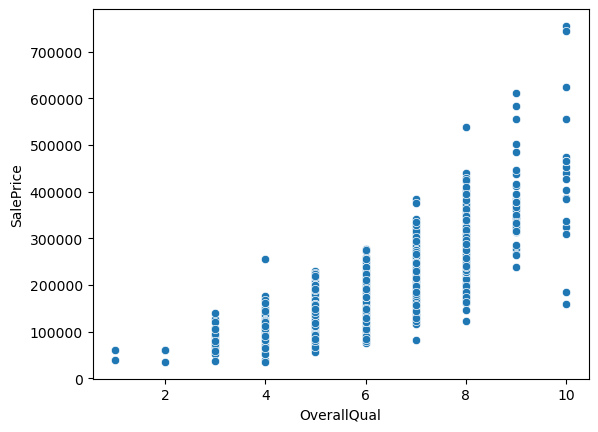

In [63]:
sns.scatterplot(df_cleaned, x='OverallQual', y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

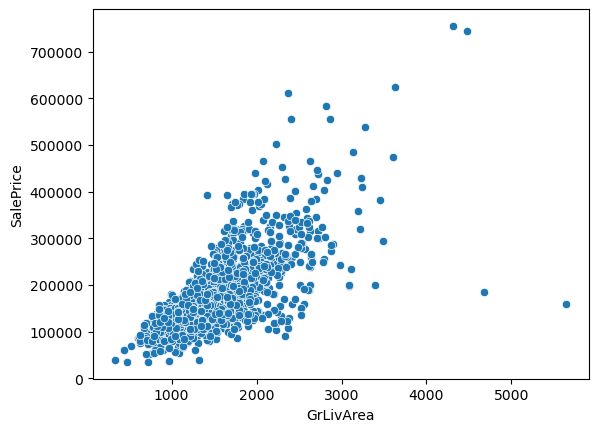

In [64]:
sns.scatterplot(df_cleaned, x='GrLivArea', y='SalePrice')

Experiment 1

MSE:  2681026163.509091
RMSE:  51778.62651238531


Text(0, 0.5, 'SalePrice')

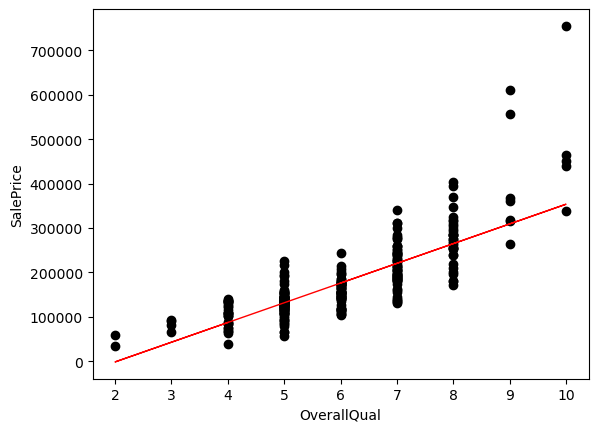

In [65]:
X = df_cleaned[['OverallQual']]
y = df_cleaned['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)) )

plt.scatter(X_test, y_test,  color='Black', linewidths=1)
plt.plot(X_test, y_pred, color='Red', linewidth=1)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

Expermient 2

In [66]:
X = df_cleaned.copy().drop(columns='SalePrice')
y = df_cleaned['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)) )

MSE:  4966768913.568806
RMSE:  70475.30711936491


In [67]:
col_to_drop = [
    'GarageYrBlt', 
    'YrSold', 
    'GarageCars', 
    'BedroomAbvGr',
    'KitchenAbvGr', 
    'BsmtHalfBath', 
    'BsmtFullBath', 
    'GarageCond',
    'LotFrontage',
    'MoSold',
    'MiscVal',
    'ScreenPorch',
    'GarageFinish',
    '1stFlrSF',
    '2ndFlrSF',
    'TotRmsAbvGrd',
    'OverallQual',
    ]
df_cleaned_ex3 = df_cleaned_copy.drop(columns=col_to_drop)

# repeat the rest of the cleaning steps from before
df_cleaned_ex3 = clean(df_cleaned_ex3)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
X = df_cleaned_ex3.copy().drop(columns='SalePrice')
y = df_cleaned_ex3['SalePrice']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

lr = linear_model.LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)) )


MSE:  3593589425.407534
RMSE:  59946.55474176589


c:\Users\scoyl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
